<a href="https://colab.research.google.com/github/chukhman/lncRNAclassifier/blob/main/Copyof_keras_binary_classifier_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
seed = 7
# load dataset
dataset = np.loadtxt("./sample_data/NewGencode4DLTraining2.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:12]
Y = dataset[:,12]

In [ ]:
(unique, counts) = np.unique(Y, return_counts=True)
print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Unique values of the target variable [0. 1.]
Counts of the target variable : [10010 17561]


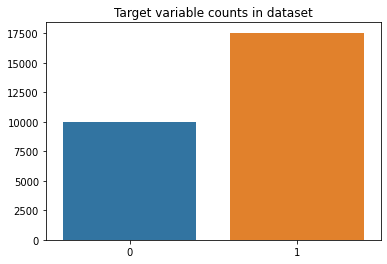

In [ ]:
sns.barplot(x=[0,1],y=[10010, 17561])
plt.title('Target variable counts in dataset')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  4132
False Positive(FP) =  143
True Negative(TN)  =  2310
False Negative(FN) =  308
Accuracy of the binary classification = 0.935


In [ ]:
models = {}

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
models['GradientBoosting'] = GradientBoostingClassifier()

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Neural Networks
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=12))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80, batch_size=64)




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1664      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 20)                2580      
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 12)                252       
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 4,509
Trainable params: 4,509
Non-traina

[]

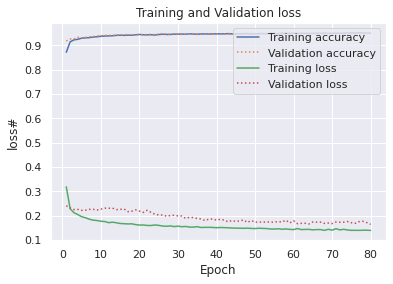

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

sns.set()
loss = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val, ':', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss#')
plt.legend(loc='upper right')
plt.plot()



In [ ]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test) > 0.5
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy_keras =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy_keras))

216/216 [==============================] - 0s 1ms/step
True Positive(TP)  =  4192
False Positive(FP) =  113
True Negative(TN)  =  2340
False Negative(FN) =  248
Accuracy of the binary classification = 0.948


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(16, input_dim=12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=64)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                208       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 20)                340       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 15)                315       
                                                                 
 dense_7 (Dense)             (None, 1)                 16        
                                                                 
Total params: 879
Trainable params: 879
Non-trainable 

[]

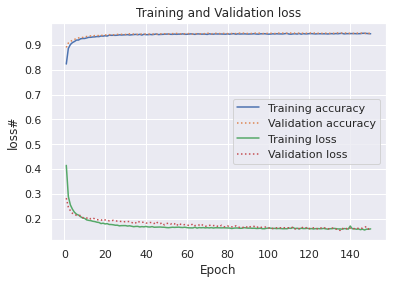

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

sns.set()
loss = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val, ':', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss#')
plt.legend(loc='center right')
plt.plot()


In [ ]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test) > 0.5
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy_keras =  (TP+TN) /(TP+FP+TN+FN)
precision_keras =  (TP) /(TP+FP)
recall_keras =  (TP) /(TP+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy_keras))
print('Precision of the binary classification = {:0.3f}'.format(precision_keras))
print('Recall of the binary classification = {:0.3f}'.format(recall_keras))

216/216 [==============================] - 0s 1ms/step
True Positive(TP)  =  4220
False Positive(FP) =  147
True Negative(TN)  =  2306
False Negative(FN) =  220
Accuracy of the binary classification = 0.947
Precision of the binary classification = 0.966
Recall of the binary classification = 0.950


216/216 [==============================] - 0s 1ms/step


Text(89.18, 0.5, 'Actual label')

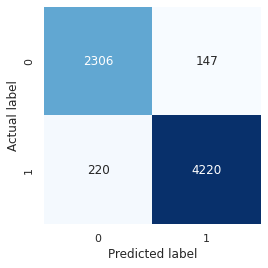

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['0', '1']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

DNN = {'Accuracy':accuracy_keras,'Precision':precision_keras,'Recall':recall_keras}
#append row to the dataframe
df_model = df_model.append(DNN, ignore_index=True)
df_model.index = ['GradientBoosting','Logistic Regression', 'Support Vector Machines', 'Decision Trees', 'Random Forest','Naive Bayes','K-Nearest Neighbor','DNN']
df_model



,Accuracy,Precision,Recall
GradientBoosting,0.947773,0.953604,0.964904
Logistic Regression,0.934571,0.930631,0.966550
Support Vector Machines,0.935297,0.926577,0.971658
Decision Trees,0.915857,0.936486,0.933124
Random Forest,0.948644,0.953153,0.966651
Naive Bayes,0.877992,0.820495,0.988066
K-Nearest Neighbor,0.888873,0.884234,0.939684
DNN,0.946758,0.966338,0.950450


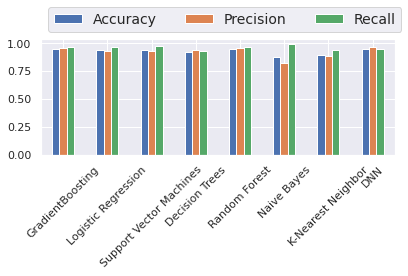

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()